In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# Explaining Stock Returns' Volatility With CCC-GARCH Models  

In [4]:
import pandas as pd
import yfinance as yf
from arch import arch_model

1- Specify the risky asset and the time horizon

In [5]:
RISKY_ASSET = 'GOOG'
START_DATE = '2015-01-01'
END_DATE = '2020-12-31'

2- Download data from Yahoo Finance

In [6]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE)
print(f'Downloaded {df.shape[0]} rows of data')

[*********************100%%**********************]  1 of 1 completed
Downloaded 1510 rows of data


3- Calculate daily returns

Average return: 0.09%


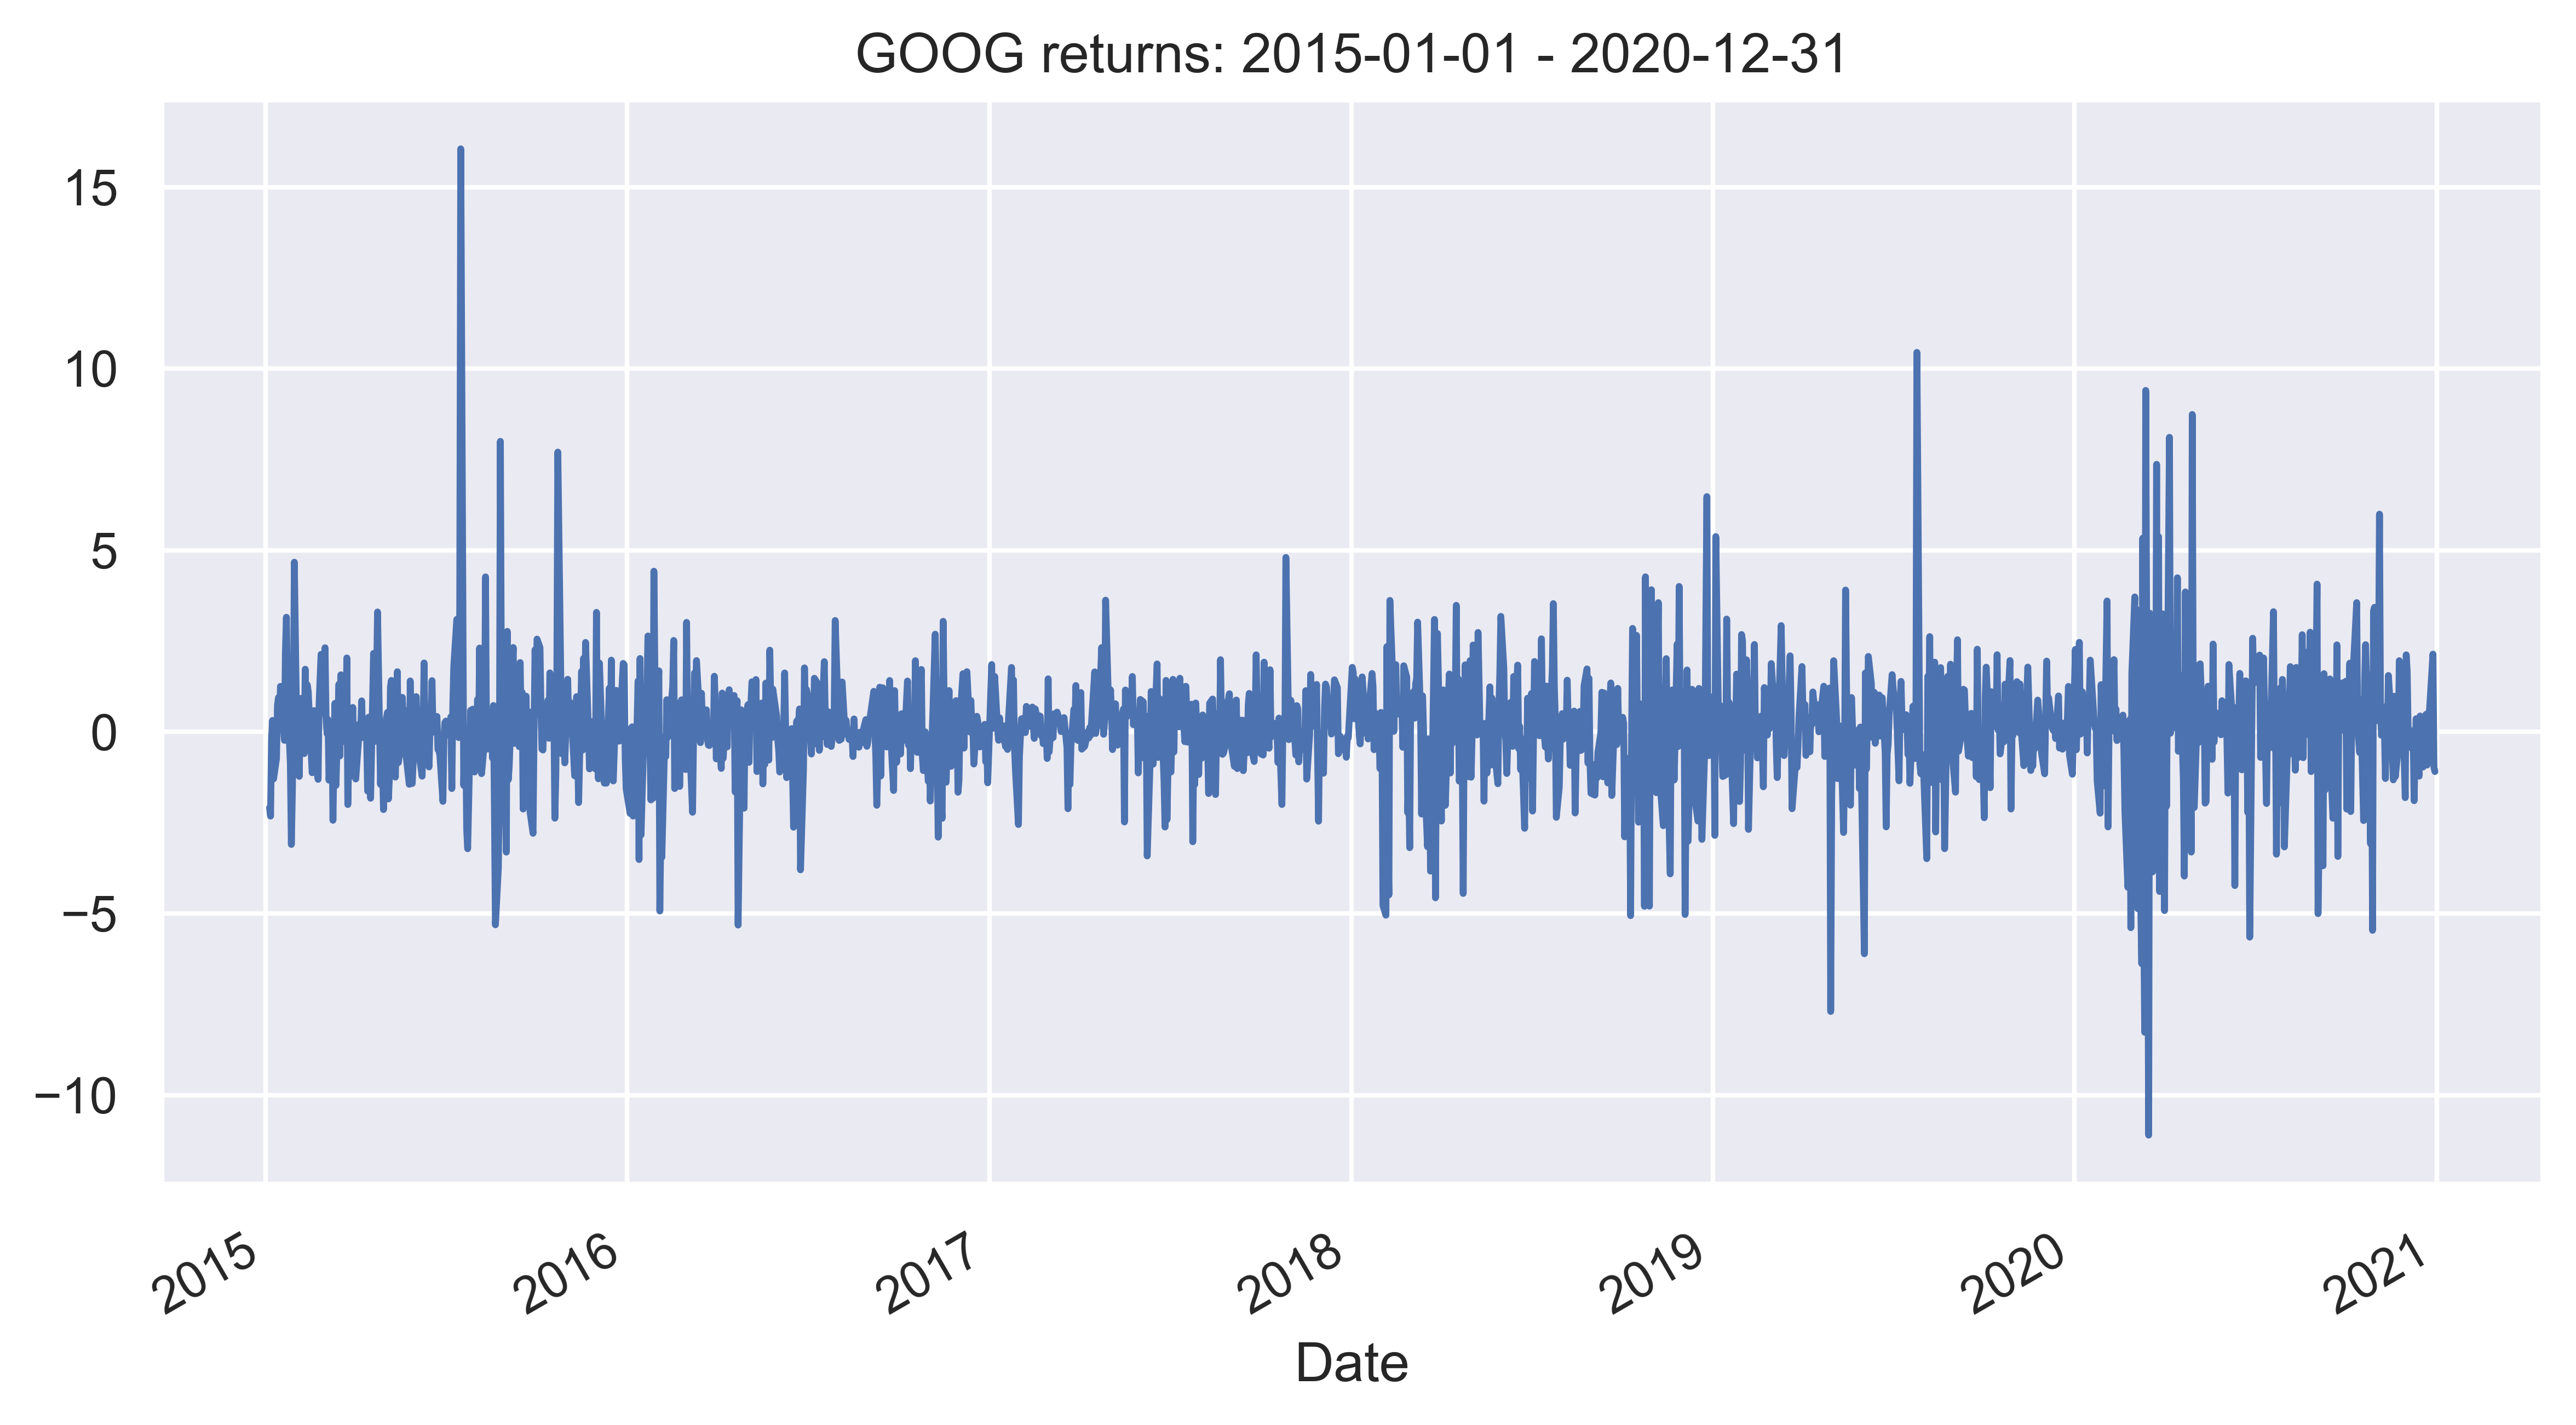

In [7]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
print(f'Average return: {round(returns.mean(), 2)}%')
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')

plt.tight_layout()
plt.show()

4- Specify the GARCH Model

In [8]:
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, o=0, q=1)

5- Estimate the model and print the summary

In [9]:
model_fitted = model.fit(disp='off')

print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2791.66
Distribution:                  Normal   AIC:                           5589.32
Method:            Maximum Likelihood   BIC:                           5605.28
                                        No. Observations:                 1509
Date:                Mon, Feb 26 2024   Df Residuals:                     1509
Time:                        15:02:32   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2952      0.202      1.458      0.145    [ -

6- Plot the residuals and the conditional volatility

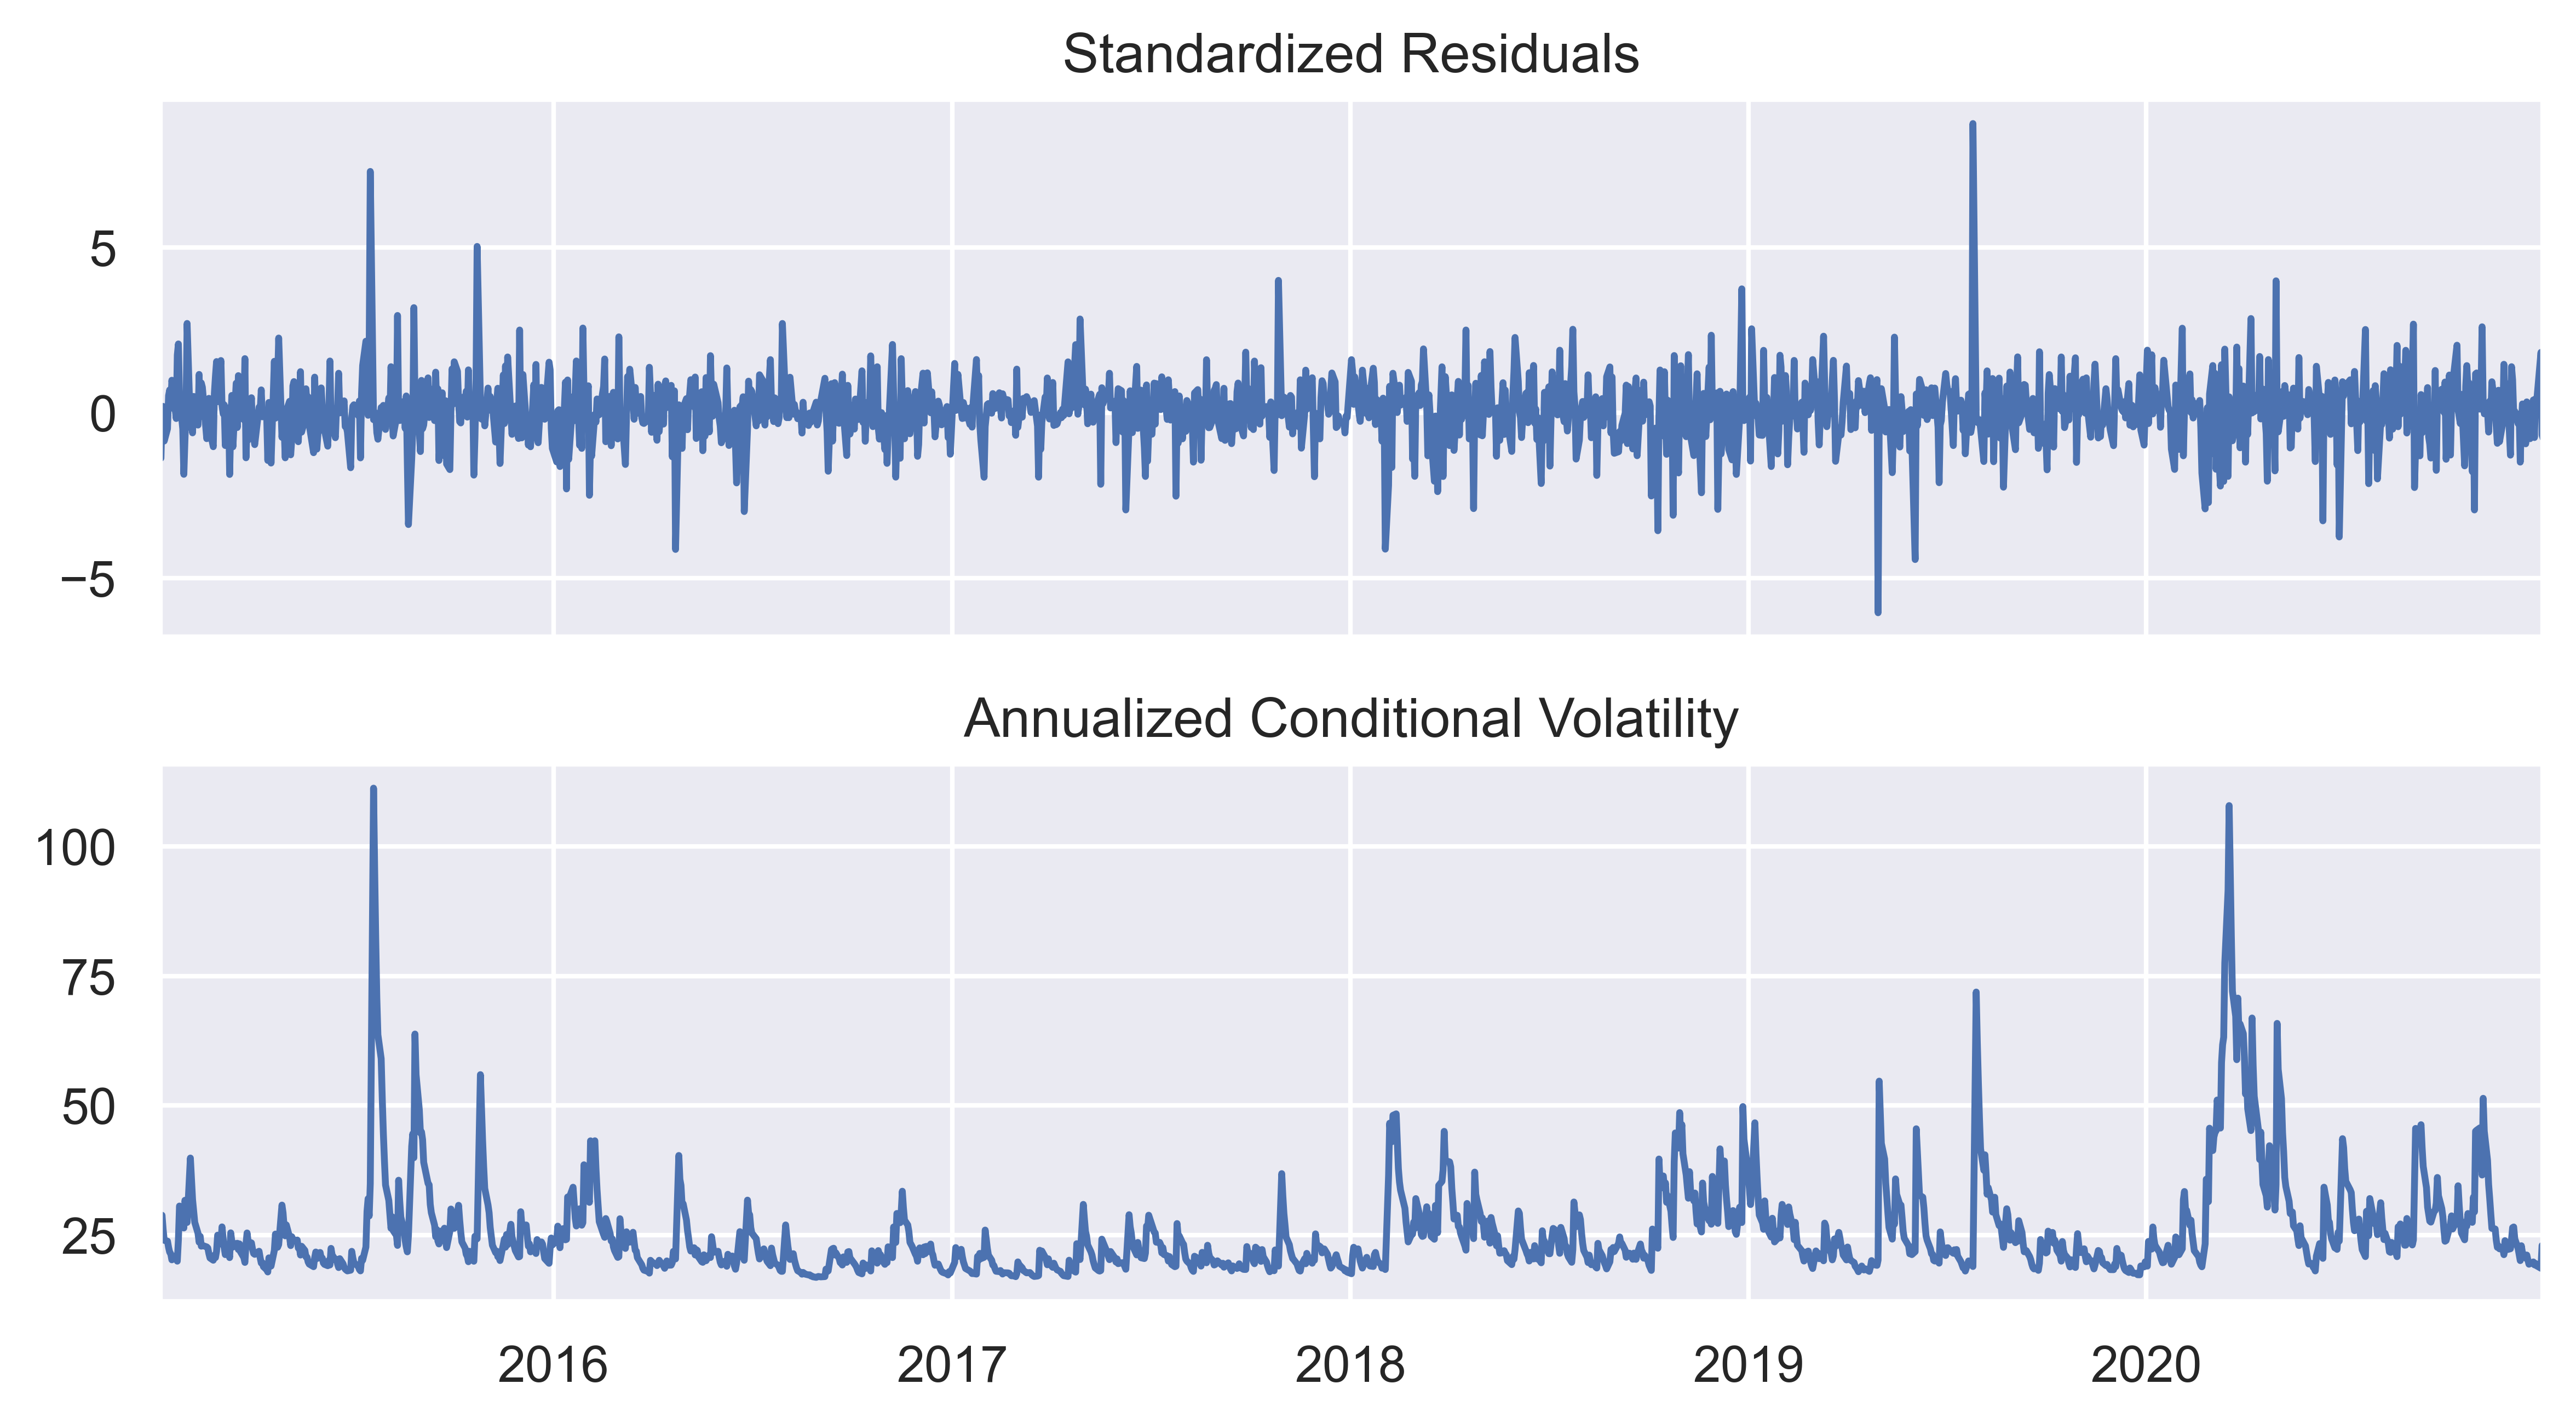

In [10]:
model_fitted.plot(annualize='D')

plt.tight_layout()
plt.show()